In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/li_niu_ping/"
# speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\li_niu_ping"
wind_turbine = "6"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
# speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (1459, 75)


In [5]:
# speed.hist(bins=128)

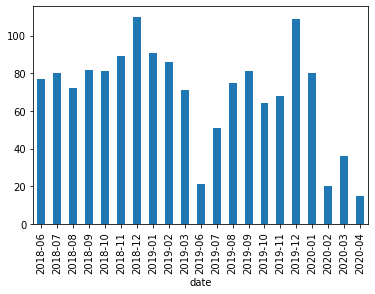

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [14]:
# 划分train set, test set
train_start = "2018-06"
train_end = "2019-10"

test_start = "2019-11"
test_end = "2020"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (1131, 75)
feature_test.shape: (328, 75)


In [15]:
feature_test = feature
# speed_test = speed

In [16]:
detector = model_entry.OutlierDetector()

In [17]:
detector.fit(feature_train)

<AxesSubplot:xlabel='date'>

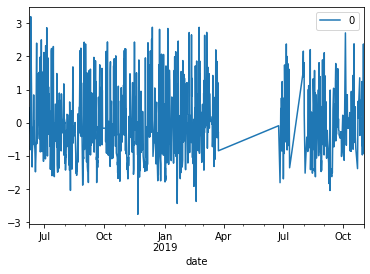

In [18]:
detector.decision_scores.plot()

In [19]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

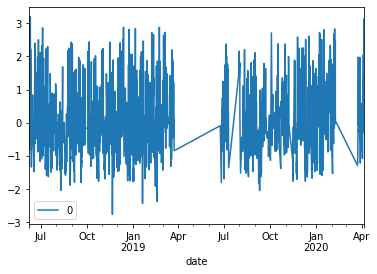

In [20]:
anomaly_scores.plot()